In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
df_2015 = pd.read_csv("2015.csv")

In [4]:
df_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [5]:
country_region_dict = df_2015[["Country", "Region"]].set_index('Country').T.to_dict('index')["Region"]
country_region_dict

{'Afghanistan': 'Southern Asia',
 'Albania': 'Central and Eastern Europe',
 'Algeria': 'Middle East and Northern Africa',
 'Angola': 'Sub-Saharan Africa',
 'Argentina': 'Latin America and Caribbean',
 'Armenia': 'Central and Eastern Europe',
 'Australia': 'Australia and New Zealand',
 'Austria': 'Western Europe',
 'Azerbaijan': 'Central and Eastern Europe',
 'Bahrain': 'Middle East and Northern Africa',
 'Bangladesh': 'Southern Asia',
 'Belarus': 'Central and Eastern Europe',
 'Belgium': 'Western Europe',
 'Benin': 'Sub-Saharan Africa',
 'Bhutan': 'Southern Asia',
 'Bolivia': 'Latin America and Caribbean',
 'Bosnia and Herzegovina': 'Central and Eastern Europe',
 'Botswana': 'Sub-Saharan Africa',
 'Brazil': 'Latin America and Caribbean',
 'Bulgaria': 'Central and Eastern Europe',
 'Burkina Faso': 'Sub-Saharan Africa',
 'Burundi': 'Sub-Saharan Africa',
 'Cambodia': 'Southeastern Asia',
 'Cameroon': 'Sub-Saharan Africa',
 'Canada': 'North America',
 'Central African Republic': 'Sub-Sahar

In [6]:
df_2015.shape

(158, 12)

In [7]:
df_2015_RegionRatio = df_2015["Region"].value_counts()
df_2015_RegionRatio

Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
Australia and New Zealand           2
North America                       2
Name: Region, dtype: int64

In [8]:
df_2015_Top30_RegionRatio = df_2015.iloc[:30,]["Region"].value_counts()
df_2015_Top30_RegionRatio

Western Europe                     14
Latin America and Caribbean         7
Middle East and Northern Africa     4
Australia and New Zealand           2
North America                       2
Southeastern Asia                   1
Name: Region, dtype: int64

In [9]:
ratio_value_2015 = np.nan_to_num((df_2015_Top30_RegionRatio * 1.0 / df_2015_RegionRatio).values)
ratio_value_2015

array([1.        , 0.        , 0.        , 0.31818182, 0.2       ,
       1.        , 0.11111111, 0.        , 0.        , 0.66666667])

In [10]:
ratio_index_2015 = (df_2015_Top30_RegionRatio * 1.0 / df_2015_RegionRatio).index
ratio_index_2015

Index([u'Australia and New Zealand', u'Central and Eastern Europe',
       u'Eastern Asia', u'Latin America and Caribbean',
       u'Middle East and Northern Africa', u'North America',
       u'Southeastern Asia', u'Southern Asia', u'Sub-Saharan Africa',
       u'Western Europe'],
      dtype='object')

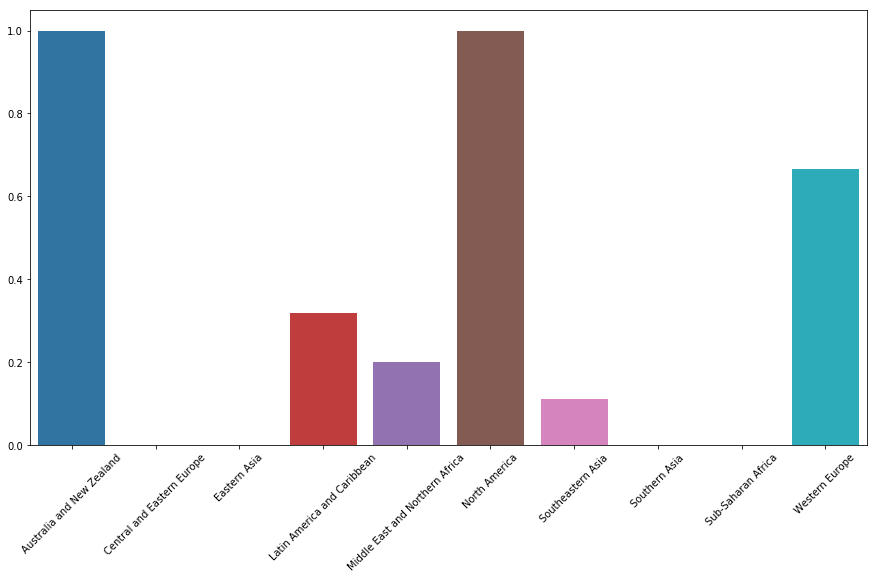

In [11]:
plt.figure(figsize=(15,8))
fig = sns.barplot(x = ratio_index_2015, y = ratio_value_2015)
plt.xticks(rotation=45)
plt.show()

In [12]:
df_2020 = pd.read_csv("2020.csv")
df_2020.shape

(153, 20)

In [13]:
def region_reassign(row):
    if country_region_dict.has_key(row["Country name"]):   
        return country_region_dict[row["Country name"]]
    else:
        return "NotFound"

In [14]:
df_2020["Region"] = df_2020.apply(region_reassign, axis = 1)
df_2020.tail()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,...,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Region
148,Central African Republic,Sub-Saharan Africa,3.4759,0.115183,3.701658,3.250141,6.625160,0.319460,45.200001,0.640881,...,0.891807,1.972317,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265,2.860198,Sub-Saharan Africa
149,Rwanda,Sub-Saharan Africa,3.3123,0.052425,3.415053,3.209547,7.600104,0.540835,61.098846,0.900589,...,0.183541,1.972317,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542,0.548445,Sub-Saharan Africa
150,Zimbabwe,Sub-Saharan Africa,3.2992,0.058674,3.414202,3.184198,7.865712,0.763093,55.617260,0.711458,...,0.810237,1.972317,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929,0.841031,Sub-Saharan Africa
151,South Sudan,Sub-Saharan Africa,2.8166,0.107610,3.027516,2.605684,7.425360,0.553707,51.000000,0.451314,...,0.763417,1.972317,0.289083,0.553279,0.208809,0.065609,0.209935,0.111157,1.378751,NotFound
152,Afghanistan,South Asia,2.5669,0.031311,2.628270,2.505530,7.462861,0.470367,52.590000,0.396573,...,0.933687,1.972317,0.300706,0.356434,0.266052,0.000000,0.135235,0.001226,1.507236,Southern Asia


In [15]:
df_2020["Region"].value_counts()

Sub-Saharan Africa                 36
Central and Eastern Europe         29
Western Europe                     21
Latin America and Caribbean        21
Middle East and Northern Africa    17
Southeastern Asia                   9
Southern Asia                       6
NotFound                            6
Eastern Asia                        4
Australia and New Zealand           2
North America                       2
Name: Region, dtype: int64

In [16]:
df_2020.loc[(df_2020["Region"] == "NotFound"),]

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,...,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Region
24,Taiwan Province of China,East Asia,6.4554,0.039140,6.532114,6.378686,10.775685,0.894309,69.599998,0.771530,...,0.731883,1.972317,1.327471,1.357761,0.878438,0.449404,0.150599,0.131516,2.160239,NotFound
77,Hong Kong S.A.R. of China,East Asia,5.5104,0.046019,5.600597,5.420203,10.934671,0.845969,76.771706,0.779834,...,0.420607,1.972317,1.376746,1.243584,1.136631,0.459357,0.288281,0.332485,0.673293,NotFound
86,Maldives,South Asia,5.1976,0.071985,5.338691,5.056509,9.518633,0.913161,70.599998,0.853963,...,0.824211,1.972317,0.937864,1.402288,0.914440,0.548204,0.224198,0.071906,1.098675,NotFound
112,Gambia,Sub-Saharan Africa,4.7506,0.067164,4.882241,4.618959,7.321815,0.693169,55.012016,0.733163,...,0.690718,1.972317,0.256991,0.882679,0.353248,0.403420,0.425990,0.158094,2.270216,NotFound
121,Namibia,Sub-Saharan Africa,4.5711,0.060983,4.690628,4.451572,9.203141,0.846881,56.501488,0.767521,...,0.851450,1.972317,0.840082,1.245738,0.406871,0.444599,0.076454,0.054320,1.503033,NotFound
151,South Sudan,Sub-Saharan Africa,2.8166,0.107610,3.027516,2.605684,7.425360,0.553707,51.000000,0.451314,...,0.763417,1.972317,0.289083,0.553279,0.208809,0.065609,0.209935,0.111157,1.378751,NotFound


In [17]:
df_2020.at[24, "Country name"] = "Taiwan"
df_2020.at[77, "Country name"] = "Hong Kong"
df_2020.at[151, "Country name"] = "Sudan"

In [18]:
df_2020["Region"] = df_2020.apply(region_reassign, axis = 1)
df_2020.tail()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,...,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual,Region
148,Central African Republic,Sub-Saharan Africa,3.4759,0.115183,3.701658,3.250141,6.625160,0.319460,45.200001,0.640881,...,0.891807,1.972317,0.041072,0.000000,0.000000,0.292814,0.253513,0.028265,2.860198,Sub-Saharan Africa
149,Rwanda,Sub-Saharan Africa,3.3123,0.052425,3.415053,3.209547,7.600104,0.540835,61.098846,0.900589,...,0.183541,1.972317,0.343243,0.522876,0.572383,0.604088,0.235705,0.485542,0.548445,Sub-Saharan Africa
150,Zimbabwe,Sub-Saharan Africa,3.2992,0.058674,3.414202,3.184198,7.865712,0.763093,55.617260,0.711458,...,0.810237,1.972317,0.425564,1.047835,0.375038,0.377405,0.151349,0.080929,0.841031,Sub-Saharan Africa
151,Sudan,Sub-Saharan Africa,2.8166,0.107610,3.027516,2.605684,7.425360,0.553707,51.000000,0.451314,...,0.763417,1.972317,0.289083,0.553279,0.208809,0.065609,0.209935,0.111157,1.378751,Sub-Saharan Africa
152,Afghanistan,South Asia,2.5669,0.031311,2.628270,2.505530,7.462861,0.470367,52.590000,0.396573,...,0.933687,1.972317,0.300706,0.356434,0.266052,0.000000,0.135235,0.001226,1.507236,Southern Asia


In [19]:
df_2020_RegionRatio = df_2020["Region"].value_counts()
df_2020_RegionRatio

Sub-Saharan Africa                 37
Central and Eastern Europe         29
Western Europe                     21
Latin America and Caribbean        21
Middle East and Northern Africa    17
Southeastern Asia                   9
Southern Asia                       6
Eastern Asia                        6
NotFound                            3
Australia and New Zealand           2
North America                       2
Name: Region, dtype: int64

In [20]:
df_2020_Top30_RegionRatio = df_2020.iloc[:30,]["Region"].value_counts()
df_2020_Top30_RegionRatio

Western Europe                     17
Latin America and Caribbean         4
Middle East and Northern Africa     3
Australia and New Zealand           2
North America                       2
Central and Eastern Europe          1
Eastern Asia                        1
Name: Region, dtype: int64

In [21]:
df_2020_RegionRatio = df_2020_RegionRatio.drop(labels=['NotFound'])

In [22]:
ratio_value_2020 = np.nan_to_num((df_2020_Top30_RegionRatio * 1.0 / df_2020_RegionRatio).values)
ratio_value_2020

array([1.        , 0.03448276, 0.16666667, 0.19047619, 0.17647059,
       1.        , 0.        , 0.        , 0.        , 0.80952381])

In [23]:
ratio_index_2020 = (df_2020_Top30_RegionRatio * 1.0 / df_2020_RegionRatio).index
ratio_index_2020

Index([u'Australia and New Zealand', u'Central and Eastern Europe',
       u'Eastern Asia', u'Latin America and Caribbean',
       u'Middle East and Northern Africa', u'North America',
       u'Southeastern Asia', u'Southern Asia', u'Sub-Saharan Africa',
       u'Western Europe'],
      dtype='object')

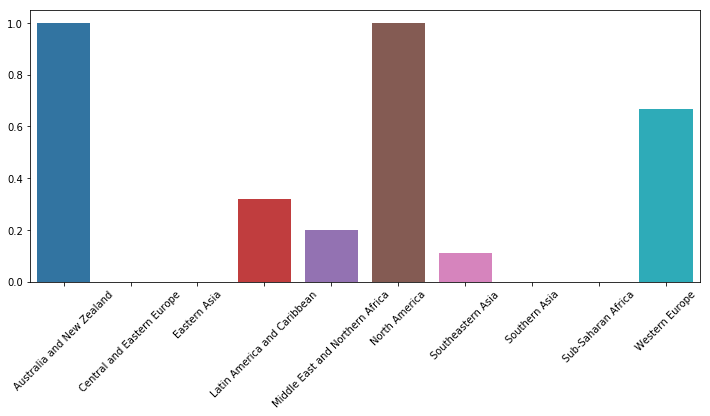

In [24]:
plt.figure(figsize=(12,5))
fig = sns.barplot(x = ratio_index_2015, y = ratio_value_2015)
plt.xticks(rotation=45)
plt.show()

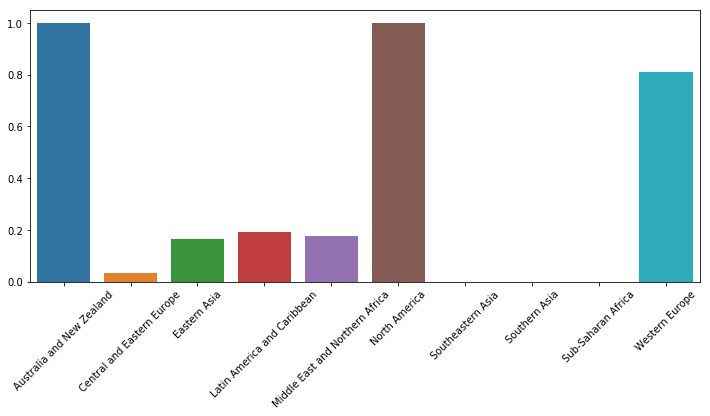

In [25]:
plt.figure(figsize=(12,5))
fig = sns.barplot(x = ratio_index_2020, y = ratio_value_2020)
plt.xticks(rotation=45)
plt.show()

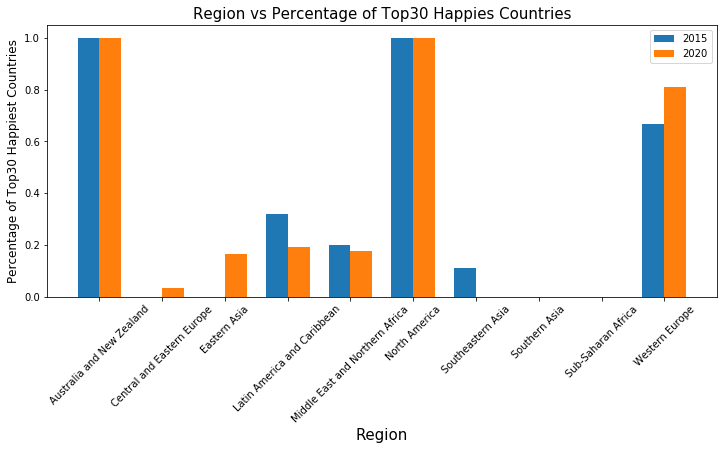

In [28]:
N = 10
ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig = plt.figure(figsize=(12,5))
ax = fig.add_subplot(111)
rects1 = ax.bar(ind, ratio_value_2015, width)

rects2 = ax.bar(ind+width, ratio_value_2020, width)

# add some
ax.set_xlabel('Region', size = 15)
ax.set_ylabel('Percentage of Top30 Happiest Countries', size = 12)
ax.set_title('Region vs Percentage of Top30 Happies Countries', size = 15)
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(ratio_index_2020, rotation=45)

ax.legend( (rects1[0], rects2[0]), ('2015', '2020') )

plt.show()